In [20]:
import win32com.client
import pandas as pd
import numpy as np
import math

import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import brentq

from ema_workbench.analysis import parcoords
from ema_workbench.analysis import feature_scoring
from ema_workbench import load_results

In [21]:
from ema_workbench import load_results
results = load_results('1000 scenarios 1 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

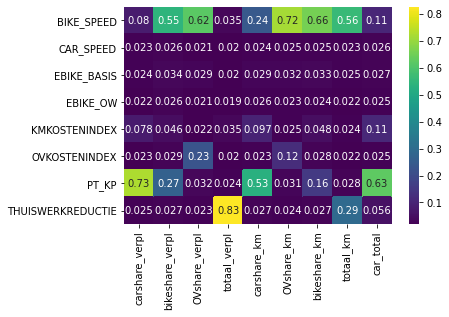

In [22]:
x = experiments.drop(['model_file','policy'], axis=1)
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [23]:
results = load_results('1000 scenarios 1 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

a = outcomes['car_total']
a.sort()
per15 = a[850]

In [24]:
results = load_results('1000 scenarios 1 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

In [25]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['car_total'] > per15
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

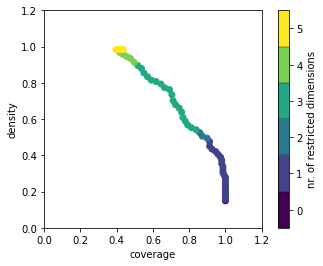

In [26]:
box1.show_tradeoff()
plt.show()

coverage    0.436242
density     0.955882
id                50
mass           0.068
mean        0.955882
res_dim            4
Name: 50, dtype: object

                     box 50             \
                        min        max   
PT_KP              0.411917  57.953630   
KMKOSTENINDEX      0.700097   0.889570   
THUISWERKREDUCTIE  0.849298   0.999899   
EBIKE_OW           0.090846   0.108986   

                                                              
                                                   qp values  
PT_KP                         [-1.0, 2.6662447679038227e-40]  
KMKOSTENINDEX                    [-1.0, 0.15043193909720132]  
THUISWERKREDUCTIE                [0.06531322682422486, -1.0]  
EBIKE_OW           [0.6572281076159854, 0.43928962320601217]  



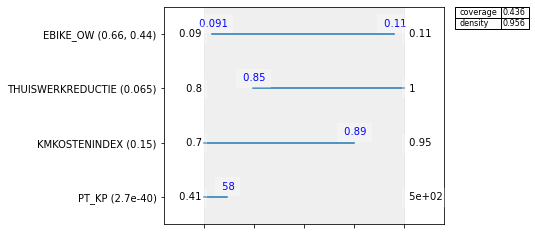

In [27]:
box1.inspect(50)
box1.inspect(50, style='graph')
plt.show()

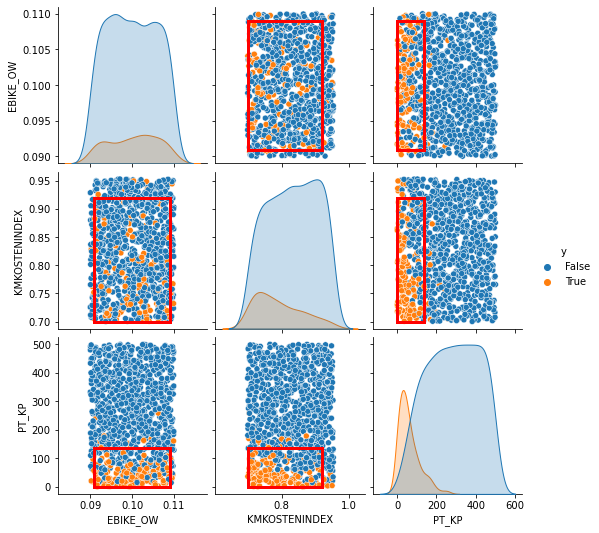

In [28]:
box1.show_pairs_scatter(30)
plt.show()

# 10 % best policies

In [29]:
results = load_results('1000 scenarios 1 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

a = outcomes['car_total']
a.sort()
per15 = a[100]

In [32]:
results = load_results('1000 scenarios 1 policies.tar.gz')

experiments, outcomes = results
outcomes['car_total'] = outcomes['carshare_km'] * outcomes['totaal_km']

In [33]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['car_total'] < per15
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

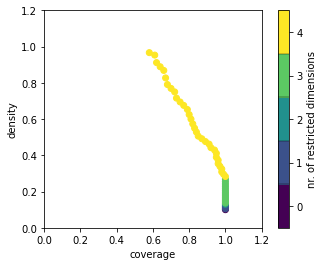

In [34]:
box1.show_tradeoff()
plt.show()

coverage        0.62
density     0.911765
id                50
mass           0.068
mean        0.911765
res_dim            4
Name: 50, dtype: object

                       box 50              \
                          min         max   
THUISWERKREDUCTIE    0.800015    0.941805   
PT_KP              331.586784  499.771000   
BIKE_SPEED          19.122735   24.591354   
KMKOSTENINDEX        0.825708    0.952797   

                                                                
                                                     qp values  
THUISWERKREDUCTIE                  [-1.0, 0.00202336862938397]  
PT_KP                            [9.416558276310725e-22, -1.0]  
BIKE_SPEED         [2.019387931609395e-09, 0.4889852979598649]  
KMKOSTENINDEX                    [4.465281135661955e-09, -1.0]  



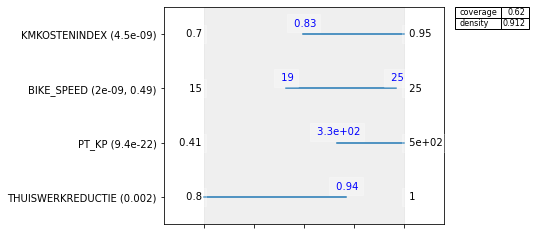

In [38]:
box1.inspect(50)
box1.inspect(50, style='graph')
plt.show()

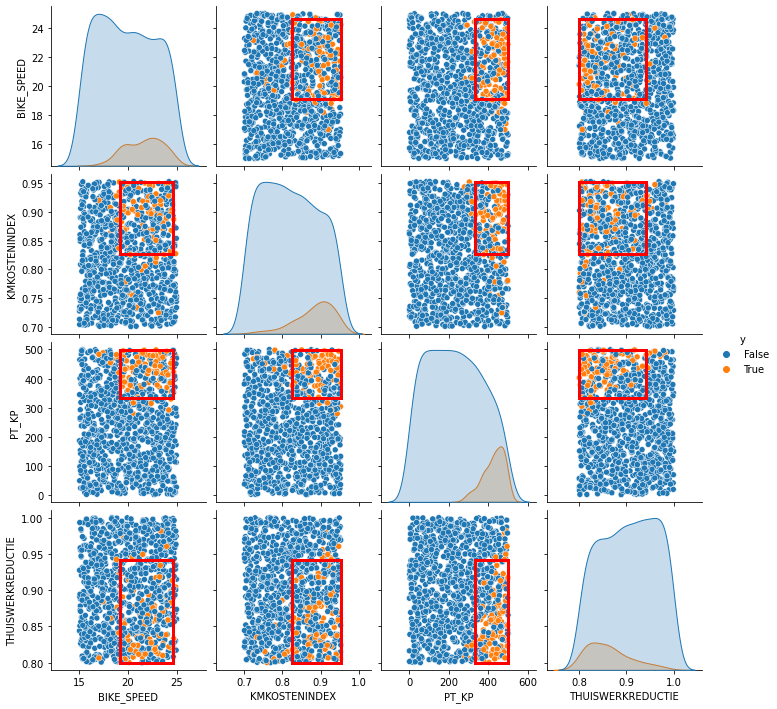

In [39]:
box1.show_pairs_scatter(50)
plt.show()

In [45]:
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType

x = experiments.drop('model_file', axis=1)
y = outcomes['car_total']

scores = feature_scoring.get_ex_feature_scores(x, y,
                                      max_features=2, mode=RuleInductionType.REGRESSION)[0]

scores = scores.rename(columns = {1:'car_total'})
scores.round(2)

,car_total
0,
PT_KP,0.55
KMKOSTENINDEX,0.11
BIKE_SPEED,0.11
THUISWERKREDUCTIE,0.07
EBIKE_BASIS,0.04
EBIKE_OW,0.04
OVKOSTENINDEX,0.04
CAR_SPEED,0.04
